In [1]:
                                        #House Price Prediction

    #Step 1:Data Loading


import pandas as pd
hpp=pd.read_csv("data.csv")
hpp


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [2]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
hpp.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
hpp.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [5]:
hpp.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<Axes: >

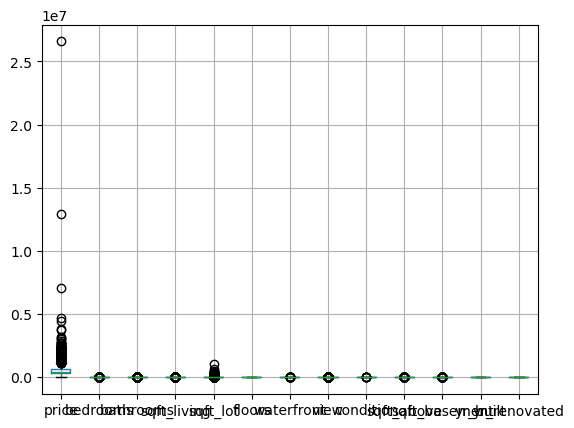

In [6]:
import matplotlib.pyplot as plt
hpp.boxplot()


In [7]:
# Step 1: Identify numeric columns
numeric_cols = hpp.select_dtypes(include='number').columns

# Step 2: Create a dictionary to store outlier info
outlier_counts = {}

# Step 3: Loop through each numeric column and detect outliers using IQR
for col in numeric_cols:
    q1 = hpp[col].quantile(0.25)
    q3 = hpp[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Count outliers
    outliers = hpp[(hpp[col] < lower_bound) | (hpp[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Step 4: Show which columns have outliers
print("Outlier counts in each column:")
print(outlier_counts)


Outlier counts in each column:
{'price': 240, 'bedrooms': 118, 'bathrooms': 141, 'sqft_living': 129, 'sqft_lot': 541, 'floors': 0, 'waterfront': 33, 'view': 460, 'condition': 6, 'sqft_above': 116, 'sqft_basement': 82, 'yr_built': 0, 'yr_renovated': 0}


In [8]:
# Fill outliers with median (column by column)
for col in numeric_cols:
    q1 = hpp[col].quantile(0.25)
    q3 = hpp[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = hpp[col].median()
    
    # Replace values outside bounds with the median
    hpp[col] = hpp[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)


In [9]:
hpp.boxplot()

<Axes: >

In [10]:
for col in hpp.select_dtypes(include='number').columns:
    q1 = hpp[col].quantile(0.25)
    q3 = hpp[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = hpp[(hpp[col] < lower_bound) | (hpp[col] > upper_bound)]
    
    print(f"{col}: {outliers.shape[0]} outliers remaining")


price: 90 outliers remaining
bedrooms: 0 outliers remaining
bathrooms: 0 outliers remaining
sqft_living: 37 outliers remaining
sqft_lot: 178 outliers remaining
floors: 0 outliers remaining
waterfront: 0 outliers remaining
view: 0 outliers remaining
condition: 0 outliers remaining
sqft_above: 38 outliers remaining
sqft_basement: 28 outliers remaining
yr_built: 0 outliers remaining
yr_renovated: 0 outliers remaining


In [11]:
        #Removing duplicates
hpp.drop_duplicates(inplace=True)

In [12]:
print("Before:", hpp.shape)
hpp.drop_duplicates(inplace=True)
print("After :", hpp.shape)


Before: (4600, 18)
After : (4600, 18)


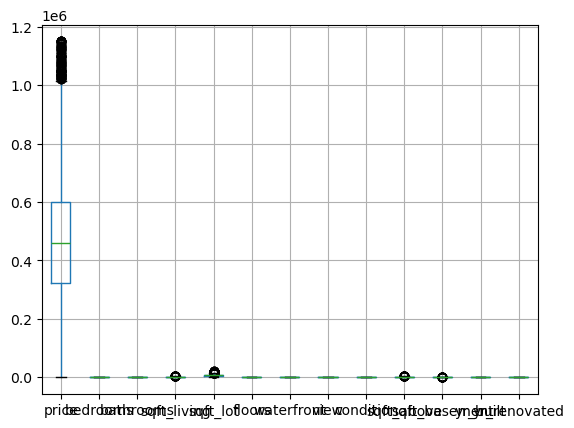

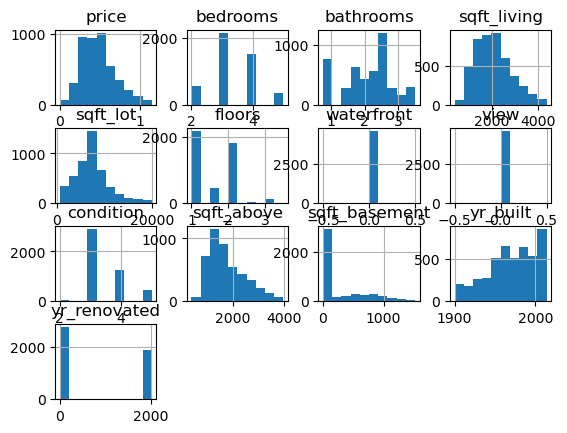

In [13]:
         #Data Visualisation
#1)Histogram
hpp.hist()
plt.title("Histogram!")
plt.show()

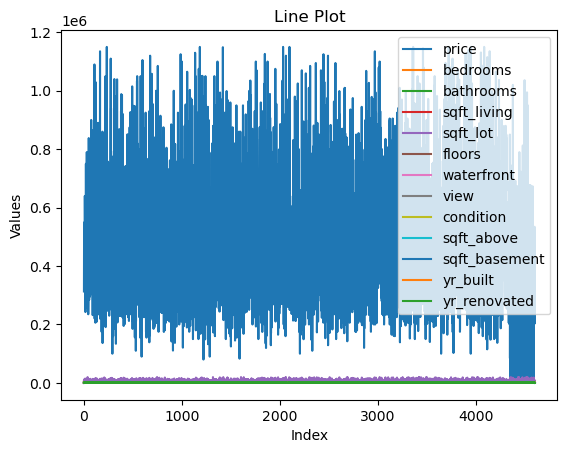

In [14]:
#2)Linechart
hpp.plot()
plt.title("Line Plot")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()



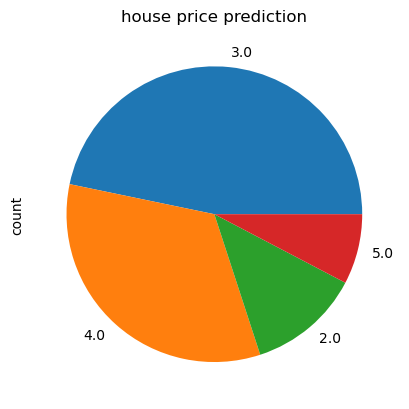

In [15]:
#3)Pie chart

hpp['bedrooms'].value_counts().plot.pie()
plt.title("house price prediction")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
x=hpp.drop(["price"],axis=1)
y=hpp[["price"]]
y

,price
0,313000.000000
1,460943.461539
2,342000.000000
3,420000.000000
4,550000.000000
...,...
4595,308166.666667
4596,534333.333333
4597,416904.166667
4598,203400.000000


In [21]:
x["street"]=le.fit_transform(x["street"])
x["statezip"]=le.fit_transform(x["statezip"])
x["city"]=le.fit_transform(x["city"])
x["country"]=le.fit_transform(x["country"])
x[" date"]=le.fit_transform(x["date"])
x

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,date
0,2014-05-02 00:00:00,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955,2005,1522,36,62,0,0
1,2014-05-02 00:00:00,5.0,2.50,3650.0,9050.0,2.0,0.0,0.0,5.0,3370.0,280.0,1921,0,3899,35,58,0,0
2,2014-05-02 00:00:00,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966,0,2291,18,26,0,0
3,2014-05-02 00:00:00,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963,0,4263,3,7,0,0
4,2014-05-02 00:00:00,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976,1992,4352,31,31,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954,1979,3447,35,62,0,68
4596,2014-07-09 00:00:00,3.0,2.50,1460.0,7573.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983,2009,960,3,6,0,68
4597,2014-07-09 00:00:00,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009,0,4033,32,37,0,68
4598,2014-07-10 00:00:00,4.0,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974,0,3498,35,71,0,69


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
x_train.size

57960

In [24]:
y_train.size

3220

In [25]:
x_test.size

24840

In [26]:
y_test.size

1380

In [27]:
x_train = x_train.drop(['date'], axis=1)
x_test = x_test.drop(['date'], axis=1)


In [28]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr

LinearRegression()

In [29]:
y_pred=lr.predict(x_test)
y_pred

array([[497147.47884539],
       [452688.44398832],
       [652452.47124028],
       ...,
       [768973.69817412],
       [511878.38882509],
       [635488.59775173]])

In [30]:
#Data Evaluation.
from sklearn.metrics import r2_score
print(r2_score(y_pred,y_test))

-1.1352945494001982


In [33]:
                #Ridge and Lasso
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Feature scaling (important for Ridge and Lasso)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)
ridge_preds = ridge.predict(x_test_scaled)

# Lasso regression
lasso = Lasso(alpha=1.0)
lasso.fit(x_train_scaled, y_train)
lasso_preds = lasso.predict(x_test_scaled)


In [34]:
print("📌 Ridge Regression")
print("R² Score:", r2_score(y_test, ridge_preds))
print("MSE:", mean_squared_error(y_test, ridge_preds))

print("\n📌 Lasso Regression")
print("R² Score:", r2_score(y_test, lasso_preds))
print("MSE:", mean_squared_error(y_test, lasso_preds))


📌 Ridge Regression
R² Score: 0.3140297219397009
MSE: 33667748517.75891

📌 Lasso Regression
R² Score: 0.3139969918289026
MSE: 33669354927.21215


In [39]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Ridge pipeline
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Lasso pipeline
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(max_iter=10000))
])

# Alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]

# Ridge GridSearch
ridge_search = GridSearchCV(ridge_pipeline, {'ridge__alpha': alphas}, cv=5)
ridge_search.fit(x, y)

# Lasso GridSearch
lasso_search = GridSearchCV(lasso_pipeline, {'lasso__alpha': alphas}, cv=5)
lasso_search.fit(x, y)

# Show results
print("✅ Ridge Best Alpha:", ridge_search.best_params_['ridge__alpha'])
print("Ridge R² Score:", ridge_search.best_score_)

print("✅ Lasso Best Alpha:", lasso_search.best_params_['lasso__alpha'])
print("Lasso R² Score:", lasso_search.best_score_)


✅ Ridge Best Alpha: 100
Ridge R² Score: 0.3396247293610232
✅ Lasso Best Alpha: 100
Lasso R² Score: 0.33960826160801244


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Ridge
ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=ridge_search.best_params_['ridge__alpha']))
])
ridge_model.fit(x_train, y_train)

# Lasso
lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=lasso_search.best_params_['lasso__alpha']))
])
lasso_model.fit(x_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=100))])

In [42]:
ridge_preds = ridge_model.predict(x_test)
lasso_preds = lasso_model.predict(x_test)


In [45]:
import pandas as pd

# Make sure all columns are 1-dimensional
results = pd.DataFrame({
    'Actual Price': y_test.values.ravel(),
    'Ridge Predicted': ridge_model.predict(x_test).ravel(),
    'Lasso Predicted': lasso_model.predict(x_test).ravel()
})

# Show first 10 rows
print(results.head(10))


    Actual Price  Ridge Predicted  Lasso Predicted
0  544000.000000    424251.567320    420834.552108
1       0.000000    431739.427292    425520.987348
2  460943.461539    735480.419225    739518.449815
3  365000.000000    533068.656889    534924.143979
4  275000.000000    397225.363068    395862.623968
5  625000.000000    567631.602196    566055.390451
6  453000.000000    415454.829003    414695.006150
7  300000.000000    466263.189031    463875.592631
8  417985.714286    491408.405559    490799.518597
9  672500.000000    511285.014491    509602.313251


In [53]:
feature_names = x.columns
# Get coefficients after fitting on full training set
ridge_coef = ridge_model.named_steps['ridge'].coef_
lasso_coef = lasso_model.named_steps['lasso'].coef_
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coef': ridge_coef,
    'Lasso Coef': lasso_coef
})

print(coef_df)


          Feature    Ridge Coef    Lasso Coef
0        bedrooms -10693.560071 -12169.717491
1       bathrooms  29437.199388  29423.805239
2     sqft_living  85130.521652  92956.578627
3        sqft_lot -11760.835058 -12418.879201
4          floors  14544.128204  14619.556591
5      waterfront      0.000000      0.000000
6            view      0.000000      0.000000
7       condition  15566.642777  15576.061845
8      sqft_above  28479.834301  23925.227200
9   sqft_basement   7564.205668   4905.301325
10       yr_built -29622.179420 -31428.860721
11   yr_renovated   4251.325053   4156.973759
12         street   5760.964138   5540.326236
13           city  34970.966712  36739.959207
14       statezip -14766.640787 -16715.207294
15        country      0.000000      0.000000
16           date   1543.161993   1303.740291


In [46]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [47]:
ridge_preds = ridge_model.predict(x_test)
lasso_preds = lasso_model.predict(x_test)


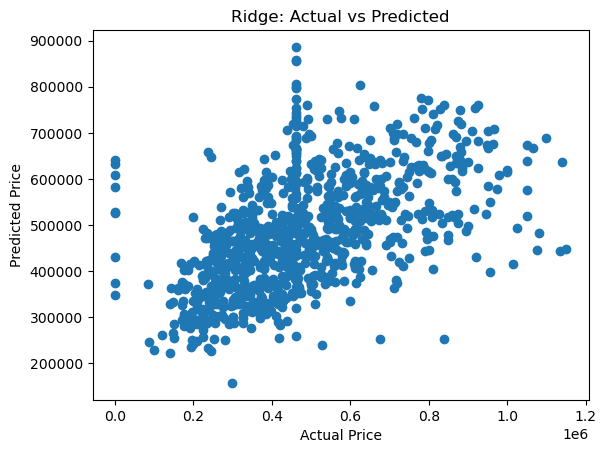

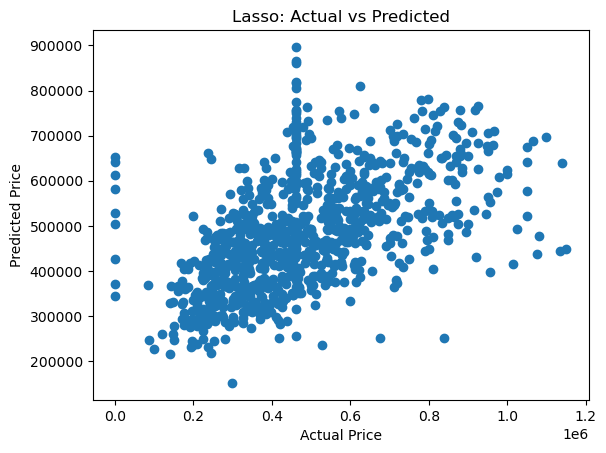

In [49]:
import matplotlib.pyplot as plt

# Ridge plot
plt.scatter(y_test, ridge_model.predict(x_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge: Actual vs Predicted")
plt.show()

# Lasso plot
plt.scatter(y_test, lasso_model.predict(x_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso: Actual vs Predicted")
plt.show()


In [54]:
print("Ridge Regression:")
print("R2 Score:", r2_score(y_test, ridge_preds))
print("MAE:", mean_absolute_error(y_test, ridge_preds))
print("MSE:", mean_squared_error(y_test, ridge_preds))

print("Lasso Regression:")
print("R2 Score:", r2_score(y_test, lasso_preds))
print("MAE:", mean_absolute_error(y_test, lasso_preds))
print("MSE:", mean_squared_error(y_test, lasso_preds))


Ridge Regression:
R2 Score: 0.3017344060160986
MAE: 133760.18663427458
MSE: 30289149024.205204
Lasso Regression:
R2 Score: 0.300537476991628
MAE: 133482.6676620439
MSE: 30341069041.324684
